상관계수 놀이 : http://guessthecorrelation.com/

# 1. 선형회귀분석

- 단순선형회귀 : $Y$ = $\beta_0$ + $\beta_1$$X$

- 다중선형회귀 : $Y$ = $\beta_0$ + $\beta_2$$X1_1$ + ... + $\beta_p$$X_p$

일반화 선형 모형 중 하나이며, 종속 변수가 수치형 자료인 경우 우선적으로 고려하는 모형

보통 다중선형회귀(Multiple Linear Regression)을 칭하며, 종속변수가 하나인 경우는 단순 선형 회귀이다.

예시 : 사업장 매출 예측, 에너지 소비량 예측

### 회귀 분석의 표준 가정

1. 독립 변수와 종속 변수 간의 선형성
2. 잔차의 등분산성
3. 종속 변수의 독립성
4. 종속 변수의 정규성

https://rstudio-pubs-static.s3.amazonaws.com/190997_40fa09db8e344b19b14a687ea5de914b.html

* 설명력($R^2$)

$R^2$는 총변동(TTS, Total Sum of Squares)에서 설명된 부분

In [0]:
import pandas as pd

from sklearn import datasets, linear_model

import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

import seaborn as sns
from seaborn.linearmodels import corrplot,symmatplot

import numpy as np

import os

import math

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## 데이터 실습

- 데이터 설명

172개 자전거 대여 업체의 마케팅 데이터

- 변수 설명

google_adwords : 구글 

AdWords, facebook : 페이스북 광고

twitter : 트위터 광고 등에 대한 비용

marketing_total : 총 마케팅 예산

revenues : 매출

employees : 종업원수

pop_density : 타켓 시장의 인구밀도 수준

#비용은 1 = 1000$을 뜻한다.

In [0]:
marketing = pd.read_csv("https://raw.githubusercontent.com/RyuJiseung/2018_Daegue_Bigdata_Camp/master/linear_regression/marketing.csv")

In [0]:
marketing = marketing.drop(['employees'],axis=1)

In [8]:
marketing.head()

,google_adwords,facebook,twitter,marketing_total,revenues,pop_density
0,65.66,47.86,52.46,165.98,39.26,High
1,39.10,55.20,77.40,171.70,38.90,Medium
2,174.81,52.01,68.01,294.83,49.51,Medium
3,34.36,61.96,86.86,183.18,40.56,High
4,78.21,40.91,30.41,149.53,40.21,Low


In [9]:
marketing.describe()

,google_adwords,facebook,twitter,marketing_total,revenues
count,172.000000,172.000000,172.000000,172.000000,172.000000
mean,169.868488,33.869651,38.982442,242.720581,44.610930
std,87.472279,15.270010,21.962255,95.859483,5.835498
min,23.650000,8.000000,5.890000,53.650000,30.450000
25%,97.247500,19.367500,20.937500,158.415000,40.327500
50%,169.475000,33.655000,34.595000,245.565000,43.995000
75%,243.105000,47.805000,52.937500,322.615000,48.612500
max,321.000000,62.170000,122.190000,481.000000,58.380000


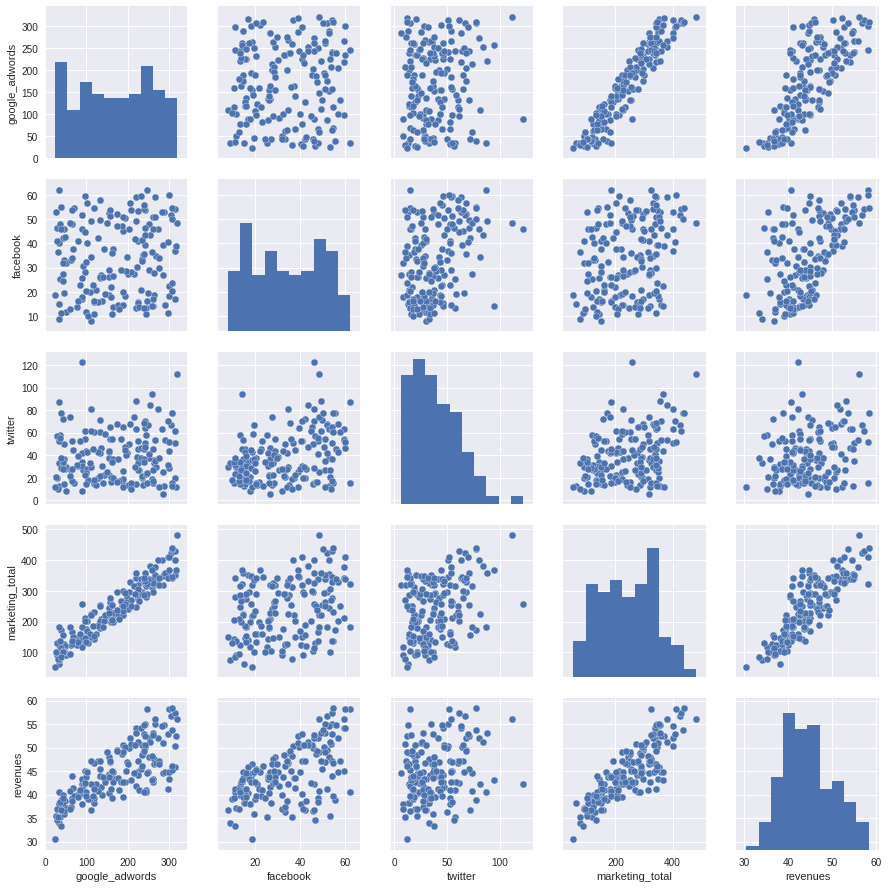

In [10]:
sns.pairplot(marketing)

In [11]:
marketing.corr()

,google_adwords,facebook,twitter,marketing_total,revenues
google_adwords,1.000000,0.076432,0.098975,0.947357,0.766246
facebook,0.076432,1.000000,0.354341,0.310223,0.577821
twitter,0.098975,0.354341,1.000000,0.375869,0.269685
marketing_total,0.947357,0.310223,0.375869,1.000000,0.853035
revenues,0.766246,0.577821,0.269685,0.853035,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/usr/local/lib/python3.6/dist-packages/seaborn/linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


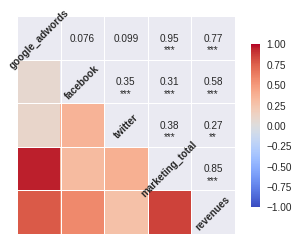

In [12]:
corrplot(marketing)

In [13]:
model = sm.ols(formula = 'revenues ~ marketing_total', data = marketing)
result = model.fit()
# 요약결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               revenues   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     454.2
Date:                Sat, 30 Jun 2018   Prob (F-statistic):           6.88e-50
Time:                        02:08:52   Log-Likelihood:                -435.09
No. Observations:                 172   AIC:                             874.2
Df Residuals:                     170   BIC:                             880.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.0067      0.636     

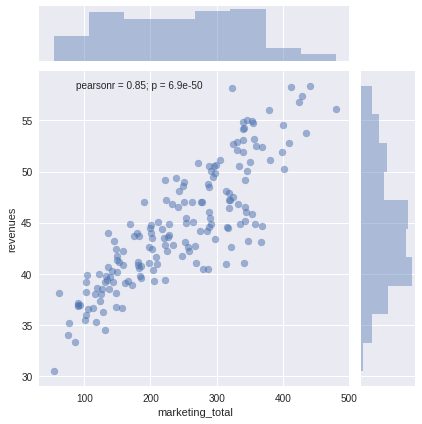

In [14]:
x, y = marketing["marketing_total"],marketing["revenues"]

# or via jointplot (with histograms aside):
sns.jointplot(x, y, kind='scatter', joint_kws={'alpha':0.5})

Text(0.5,0,'revenues')

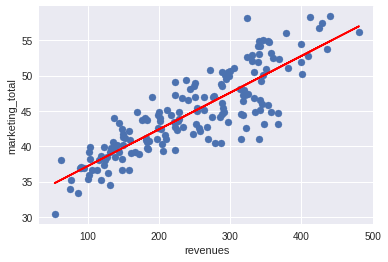

In [15]:
plt.scatter(x,y)
plt.plot(x,result.predict(marketing[["marketing_total"]]),'r')
plt.ylabel('marketing_total')
plt.xlabel('revenues')

In [16]:
model = sm.ols(formula = 'revenues ~ google_adwords', data = marketing)
result = model.fit()
# 요약결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               revenues   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     241.8
Date:                Sat, 30 Jun 2018   Prob (F-statistic):           1.75e-34
Time:                        02:08:55   Log-Likelihood:                -470.88
No. Observations:                 172   AIC:                             945.8
Df Residuals:                     170   BIC:                             952.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         35.9276      0.628     57.

In [17]:
model = sm.ols(formula = 'revenues ~ facebook', data = marketing)
result = model.fit()
# 요약결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               revenues   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     85.21
Date:                Sat, 30 Jun 2018   Prob (F-statistic):           1.05e-16
Time:                        02:08:55   Log-Likelihood:                -512.02
No. Observations:                 172   AIC:                             1028.
Df Residuals:                     170   BIC:                             1034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1319      0.888     41.800      0.0

In [18]:
model = sm.ols(formula = 'revenues ~ twitter', data = marketing)
result = model.fit()
# 요약결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               revenues   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     13.33
Date:                Sat, 30 Jun 2018   Prob (F-statistic):           0.000347
Time:                        02:08:56   Log-Likelihood:                -540.46
No. Observations:                 172   AIC:                             1085.
Df Residuals:                     170   BIC:                             1091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.8176      0.877     47.660      0.0

In [19]:
model1 = sm.ols(formula = 'revenues ~ google_adwords + facebook', data = marketing)
result1 = model1.fit()
# 요약결과 출력
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               revenues   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     512.0
Date:                Sat, 30 Jun 2018   Prob (F-statistic):           1.90e-72
Time:                        02:08:57   Log-Likelihood:                -378.88
No. Observations:                 172   AIC:                             763.8
Df Residuals:                     169   BIC:                             773.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         29.6195      0.509     58.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfX0 = marketing[["google_adwords","facebook"]]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
vif["features"] = dfX0.columns
vif

,VIF Factor,features
0,3.142389,google_adwords
1,3.142389,facebook


In [21]:
model = sm.ols(formula = 'revenues ~ google_adwords + facebook + twitter', data = marketing)
result = model.fit()
# 요약결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               revenues   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     339.8
Date:                Sat, 30 Jun 2018   Prob (F-statistic):           4.36e-71
Time:                        02:08:59   Log-Likelihood:                -378.77
No. Observations:                 172   AIC:                             765.5
Df Residuals:                     168   BIC:                             778.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         29.5460      0.534     55.

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfX0 = marketing[["google_adwords","facebook","twitter"]]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
vif["features"] = dfX0.columns
vif

,VIF Factor,features
0,3.436268,google_adwords
1,5.009430,facebook
2,4.384159,twitter


In [0]:
train = marketing[:int(len(marketing)*0.7)]
test = marketing[int(len(marketing)*0.7):]

In [0]:
y_fit = result1.predict(test[['google_adwords','facebook']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


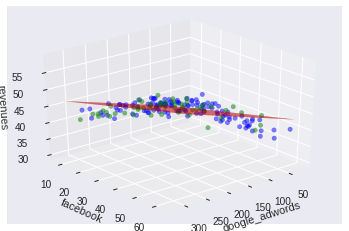

In [25]:
x_surf, y_surf = np.meshgrid(np.linspace(marketing.google_adwords.min(), marketing.google_adwords.max(), 100),np.linspace(marketing.facebook.min(), marketing.facebook.max(), 100))
onlyX = pd.DataFrame({'google_adwords': x_surf.ravel(), 'facebook': y_surf.ravel()})
fittedY=result1.predict(exog=onlyX)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='r', alpha=0.7)
ax.scatter(train['google_adwords'],train['facebook'],train['revenues'],c='blue', marker='o', alpha=0.5)
ax.scatter(test['google_adwords'],test['facebook'],test['revenues'],c='green', marker='o', alpha=0.5)
ax.set_xlabel('google_adwords')
ax.set_ylabel('facebook')
ax.set_zlabel('revenues')
ax.view_init(azim=50)

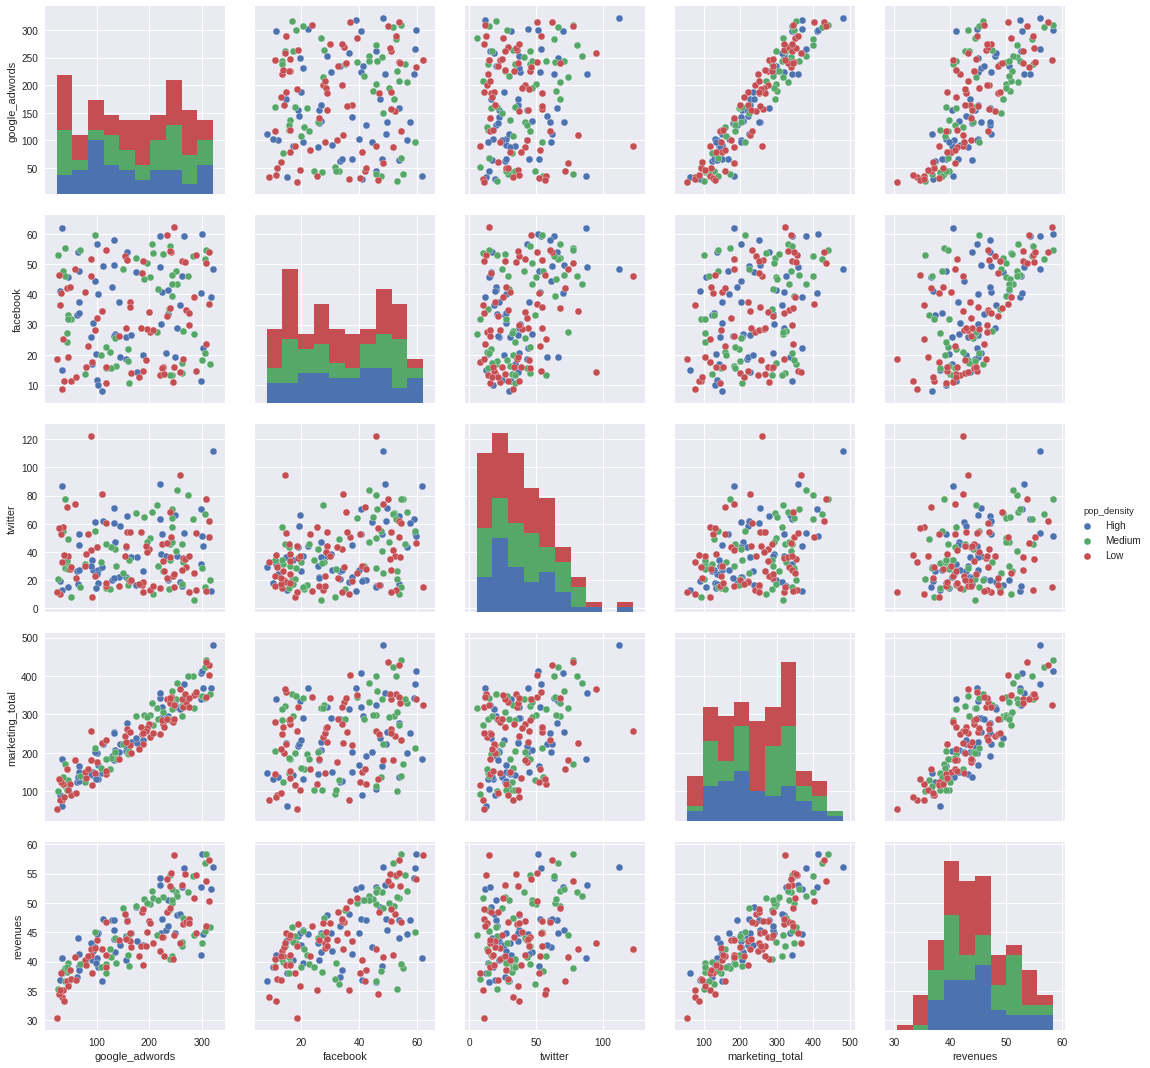

In [26]:
sns.pairplot(marketing, hue='pop_density',size=3)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


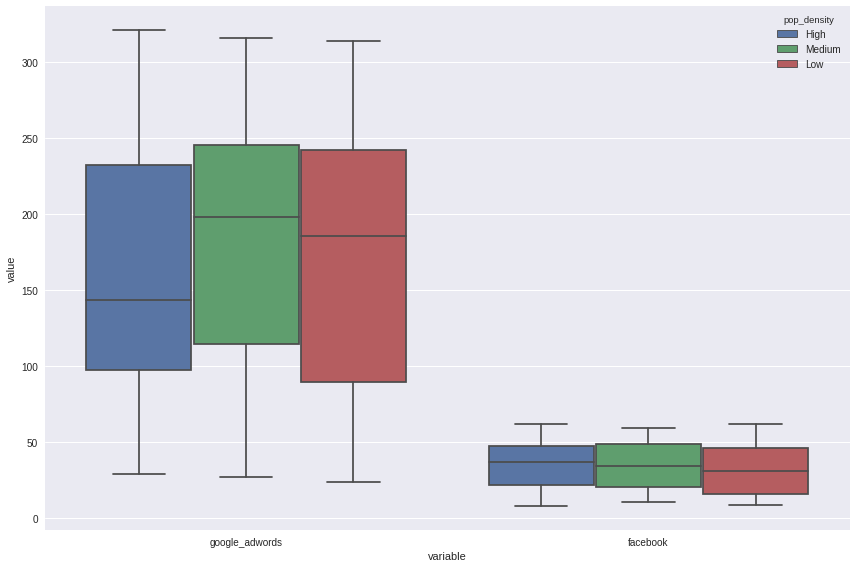

In [27]:
sns.factorplot(kind='box', y='value', x='variable', hue='pop_density',
               data=pd.melt(marketing, id_vars=['pop_density'], value_vars=['google_adwords', 'facebook']), size=8, aspect=1.5, legend_out=False) 

<데이터 분석 결과 요약 정리>

인구밀도가 높은 곳을 타겟팅하는 자전거 대여 업체에서는 facebook광고를 사용하는 것이 낫고, 

인구밀도가 낮은 곳을 타겟팅하는 자전거 대여 업체에서는 google_adwords광고를 사용하는 것이 낫다.

단, facebook광고는 1(1000$) 증가할 때마다 0.19씩 수익이 증가하고, google_adwords광고는 1(1000$) 증가할 때마다 0.04씩 수익이 증가하기 때문에 가성비가 좋은 것은 facebook광고이다.

그러나 google_adwords와 수익간의 상관성이 높기 때문에 google_adwords에 투자하면 수익이 증가할 것이라는 안전성은 확보된다.